# **Analisi diffusione COVID-19 nel mondo**

Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo

https://github.com/owid/covid-19-data/tree/master/public/data;

alla voce "🗂 Download our complete COVID-19 dataset" scaricare il dataset nel formato che si preferisce.

In [248]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [249]:
# Importo le librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [250]:
# Importo Dataset
df = pd.read_csv('/content/drive/MyDrive/Final_Test_3/owid-covid-data.csv')

• Si richiede di verificare le dimensioni del dataset e i relativi metadati;

In [251]:
df.shape

(387249, 67)

In [252]:
# Visualizzo primi 5 record
print("Prime 5 righe del dataset:")
df.head()

Prime 5 righe del dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [253]:
# Visualizzo ultimi 5 record
print("Utime 5 righe del dataset:")
df.tail()

Utime 5 righe del dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
387244,ZWE,Africa,Zimbabwe,2024-03-13,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387245,ZWE,Africa,Zimbabwe,2024-03-14,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387246,ZWE,Africa,Zimbabwe,2024-03-15,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387247,ZWE,Africa,Zimbabwe,2024-03-16,266359.0,0.0,0.143,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
387248,ZWE,Africa,Zimbabwe,2024-03-17,266359.0,0.0,0.000,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [254]:
# Visualizzo 5 record casuali
print("5 righe casuali del dataset: ")
df.sample(5)

5 righe casuali del dataset: 


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
112288,FLK,South America,Falkland Islands,2020-12-24,23.0,0.0,0.571,NaN,0.0,0.000,...,NaN,NaN,NaN,81.44,NaN,3801.0,NaN,NaN,NaN,NaN
79092,HRV,Europe,Croatia,2022-03-14,1072430.0,0.0,1353.857,15321.0,0.0,18.143,...,39.9,NaN,5.54,78.49,0.851,4030361.0,NaN,NaN,NaN,NaN
1142,AFG,Asia,Afghanistan,2023-02-20,209086.0,0.0,32.857,7877.0,0.0,0.000,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
78117,CIV,Africa,Cote d'Ivoire,2023-09-24,88338.0,0.0,0.000,835.0,0.0,0.000,...,NaN,19.351,NaN,57.78,0.538,28160548.0,NaN,NaN,NaN,NaN
337551,TWN,Asia,Taiwan,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN


In [255]:
# Lista colonne in ordine ascendente
print("Intestazioni colonne in ordine alfabetico: ")
columns_list = list(df.columns)
columns_list.sort()
columns_list

Intestazioni colonne in ordine alfabetico: 


['aged_65_older',
 'aged_70_older',
 'cardiovasc_death_rate',
 'continent',
 'date',
 'diabetes_prevalence',
 'excess_mortality',
 'excess_mortality_cumulative',
 'excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative_per_million',
 'extreme_poverty',
 'female_smokers',
 'gdp_per_capita',
 'handwashing_facilities',
 'hosp_patients',
 'hosp_patients_per_million',
 'hospital_beds_per_thousand',
 'human_development_index',
 'icu_patients',
 'icu_patients_per_million',
 'iso_code',
 'life_expectancy',
 'location',
 'male_smokers',
 'median_age',
 'new_cases',
 'new_cases_per_million',
 'new_cases_smoothed',
 'new_cases_smoothed_per_million',
 'new_deaths',
 'new_deaths_per_million',
 'new_deaths_smoothed',
 'new_deaths_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred',
 'new_tests',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'ne

In [256]:
# Dataset ridotto con solo colonne necessarie per l'analisi
df = df[['continent', 'location', 'date', 'total_cases', 'new_cases', 'icu_patients', 'hosp_patients']]

In [257]:
df.head()

,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
0,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN
1,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN
2,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN
3,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN
4,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN


In [258]:
# Tipi di dati delle colonne
print("\nTipi di dati delle colonne:")
print(df.dtypes)


Tipi di dati delle colonne:
continent         object
location          object
date              object
total_cases      float64
new_cases        float64
icu_patients     float64
hosp_patients    float64
dtype: object


In [259]:
# Modifico il tipo di dato della colonna date in datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [260]:
# Conteggio dei valori NaN o nulli per colonna
df.isna().sum()

continent         18527
location              0
date                  0
total_cases       38916
new_cases         10969
icu_patients     348607
hosp_patients    347075
dtype: int64

In [261]:
cols = ['total_cases', 'new_cases', 'icu_patients', 'hosp_patients']

# Sostituisco in queste colonne i NaN con 0
df[cols] = df[cols].fillna(0)

# Modifico il tipo di dato di queste colonne in intero
for col in cols:
    df[col] = df[col].astype(int)

In [262]:
# Verifica tipo
df.dtypes

continent                object
location                 object
date             datetime64[ns]
total_cases               int64
new_cases                 int64
icu_patients              int64
hosp_patients             int64
dtype: object

In [263]:
# Verifica NaN
df.isna().sum()

continent        18527
location             0
date                 0
total_cases          0
new_cases            0
icu_patients         0
hosp_patients        0
dtype: int64

• Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [264]:
# Numero di righe nelle colonna "continent" aventi valori NaN
df.continent.isna().sum()

18527

In [265]:
df.shape

(387249, 7)

In [266]:
# Filtro: elimino righe con valori NaN nella colonna 'continent'
df_filtered = df.dropna(subset=['continent'])
df_filtered.shape

(368722, 7)

In [267]:
# Numero di righe nelle colonna "continent" aventi valori NaN
df_filtered.continent.isna().sum()

0

In [268]:
df_filtered.groupby('continent').new_cases.sum()

continent
Africa            13141282
Asia             301446461
Europe           252376812
North America    124530643
Oceania           14808170
South America     68718448
Name: new_cases, dtype: int64

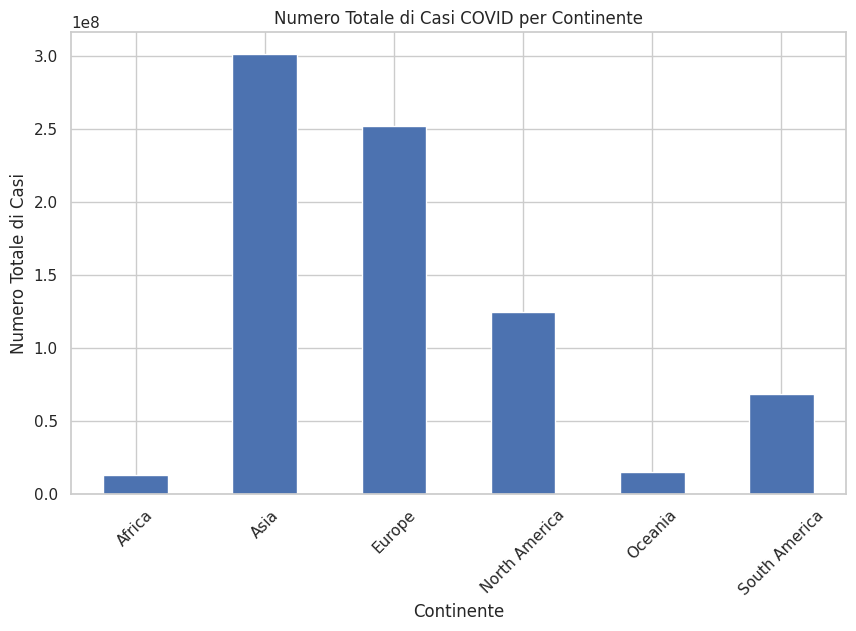

In [269]:
import pandas as pd
import matplotlib.pyplot as plt

# Raggruppamento dei dati per continente e calcolo della somma dei casi nuovi
cases_by_continent = df_filtered.groupby('continent').new_cases.sum()

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
cases_by_continent.plot(kind='bar')
plt.title('Numero Totale di Casi COVID per Continente')
plt.xlabel('Continente')
plt.ylabel('Numero Totale di Casi')
plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.tight_layout()
plt.show()


• Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [270]:
df.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [271]:
#Chiedo all'utente di inserire i due continenti
continent1 = input('Inserisci il nome del primo continente:  ')
continent2 = input('Inserisci il nome del secondo continente: ')

def confronta_continenti(df, continent1, continent2):
    # Filtro il DataFrame per i due continenti specificati
    df_continent1 = df[df['continent'] == continent1]
    df_continent2 = df[df['continent'] == continent2]

    # Calcolo i descrittori statistici per il primo continente
    min1 = round(df_continent1['total_cases'].min(), 2)
    max1 = round(df_continent1['total_cases'].max(), 2)
    mean1 = round(df_continent1['total_cases'].mean(), 2)

    # Calcolo i descrittori statistici per il secondo continente
    min2 = round(df_continent2['total_cases'].min(), 2)
    max2 = round(df_continent2['total_cases'].max(), 2)
    mean2 = round(df_continent2['total_cases'].mean(), 2)

    # Calcolo il totale dei casi nel mondo
    df['continent'] = df['continent'].astype(str)
    max_cases_per_continent = df.groupby('continent')['total_cases'].max()
    total_world_cases = max_cases_per_continent.sum()


    # Calcolo il totale dei casi per continente (max valore, dati cumulativi)
    total_cases_continent1 = df_continent1['total_cases'].max()
    total_cases_continent2 = df_continent2['total_cases'].max()

    # Calcolo la percentuale rispetto al totale mondiale
    percent_continent1 = round((total_cases_continent1 / total_world_cases) * 100, 2)
    percent_continent2 = round((total_cases_continent2 / total_world_cases) * 100, 2)

    # Stampo a video i risultati
    print(f"Descrittori per {continent1}:")
    print(f"Minimo: {min1}")
    print(f"Massimo: {max1}")
    print(f"Media: {mean1}")
    print(f"Percentuale del totale mondiale: {percent_continent1}%\n")

    print(f"Descrittori per {continent2}:")
    print(f"Minimo: {min2}")
    print(f"Massimo: {max2}")
    print(f"Media: {mean2}")
    print(f"Percentuale del totale mondiale: {percent_continent2}%")

# Eseguo la funzione
confronta_continenti(df, continent1, continent2)
print()

Inserisci il nome del primo continente:  Europe
Inserisci il nome del secondo continente: Asia
Descrittori per Europe:
Minimo: 0
Massimo: 38997490
Media: 2409966.15
Percentuale del totale mondiale: 3.64%

Descrittori per Asia:
Minimo: 0
Massimo: 99343195
Media: 2744908.07
Percentuale del totale mondiale: 9.28%



In [272]:
df.groupby('continent')['total_cases'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,87439.0,1.461222e+05,4.418607e+05,0.0,6396.0,26914.0,99338.0,4072636.0
Asia,76493.0,2.744908e+06,9.792582e+06,0.0,9605.0,221217.0,1067030.0,99343195.0
Europe,83565.0,2.409966e+06,6.135204e+06,0.0,9769.0,246263.0,1604839.0,38997490.0
North America,62924.0,1.742779e+06,1.112155e+07,0.0,1661.0,12060.0,135171.0,103436829.0
Oceania,36821.0,2.581686e+05,1.475593e+06,0.0,0.0,825.0,16138.0,11812024.0
South America,21480.0,2.972261e+06,7.055186e+06,0.0,36652.0,492220.0,2046328.0,37519960.0
nan,18527.0,1.061061e+08,1.581661e+08,0.0,3452502.0,40161376.0,136892983.0,774954379.0


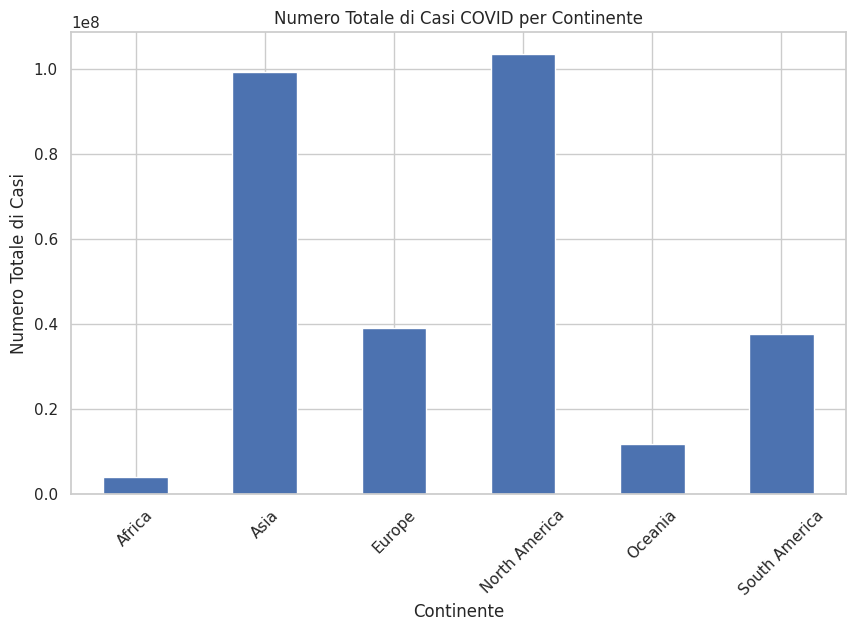

In [273]:
# Raggruppamento dei dati per continente e calcolo della somma dei casi nuovi
cases_by_continent = df_filtered.groupby('continent').total_cases.max()

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
cases_by_continent.plot(kind='bar')
plt.title('Numero Totale di Casi COVID per Continente')
plt.xlabel('Continente')
plt.ylabel('Numero Totale di Casi')
plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.tight_layout()
plt.show()

• Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

In [274]:
italy_df.head()

,date,total_cases,new_cases,year,cumulative_cases
166369,2022-01-01,5622431,0,2022,0
166370,2022-01-02,6267035,644604,2022,644604
166371,2022-01-03,6267035,0,2022,644604
166372,2022-01-04,6267035,0,2022,644604
166373,2022-01-05,6267035,0,2022,644604


In [275]:
italy_df.dtypes

date                datetime64[ns]
total_cases                  int64
new_cases                    int64
year                         int32
cumulative_cases             int64
dtype: object

In [276]:
italy_df = df[df['location'] == 'Italy']
italy_df = italy_df[['date', 'total_cases', 'new_cases']]
italy_df = italy_df[italy_df['total_cases']>0]

In [277]:
# Assumendo che 'df' sia il tuo DataFrame e 'date' sia il nome della colonna da convertire
italy_df['date'] = pd.to_datetime(italy_df['date'], errors='coerce')
italy_df['year'] = italy_df['date'].dt.year

In [278]:
italy_df

,date,total_cases,new_cases,year
165670,2020-02-02,3,3,2020
165671,2020-02-03,3,0,2020
165672,2020-02-04,3,0,2020
165673,2020-02-05,3,0,2020
165674,2020-02-06,3,0,2020
...,...,...,...,...
167171,2024-03-13,26717082,0,2024
167172,2024-03-14,26717082,0,2024
167173,2024-03-15,26717082,0,2024
167174,2024-03-16,26717082,0,2024


In [279]:
italy_df = italy_df[italy_df['year']==2022]
italy_df.sort_values('date', inplace=True)
italy_df.head(5)

<ipython-input-279-be369c531cb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_df.sort_values('date', inplace=True)


,date,total_cases,new_cases,year
166369,2022-01-01,5622431,0,2022
166370,2022-01-02,6267035,644604,2022
166371,2022-01-03,6267035,0,2022
166372,2022-01-04,6267035,0,2022
166373,2022-01-05,6267035,0,2022


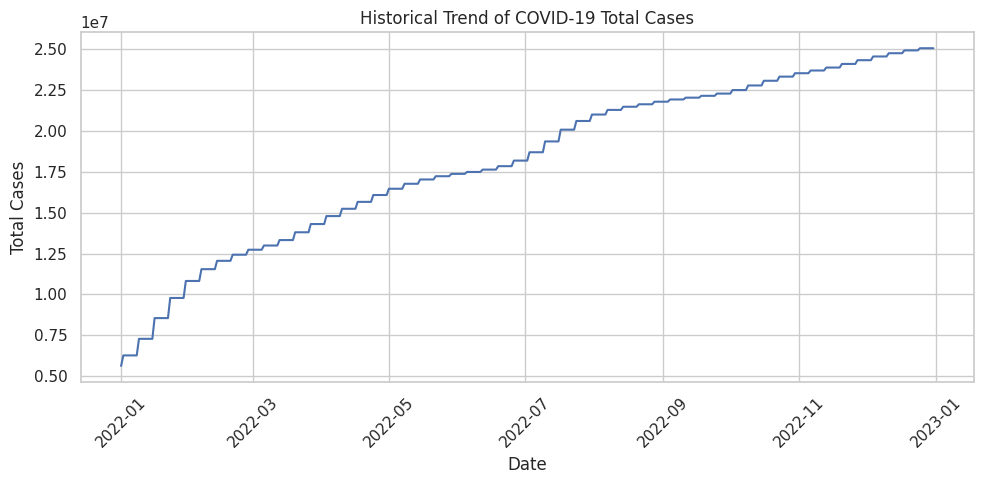

In [280]:
plt.figure(figsize=(10, 5))
plt.plot(italy_df['date'], italy_df['total_cases'], marker='', linestyle='-', color='b')
plt.title('Historical Trend of COVID-19 Total Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [281]:
italy_df['cumulative_cases'] = italy_df['new_cases'].cumsum()

<ipython-input-281-94bd8f49bdf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_df['cumulative_cases'] = italy_df['new_cases'].cumsum()


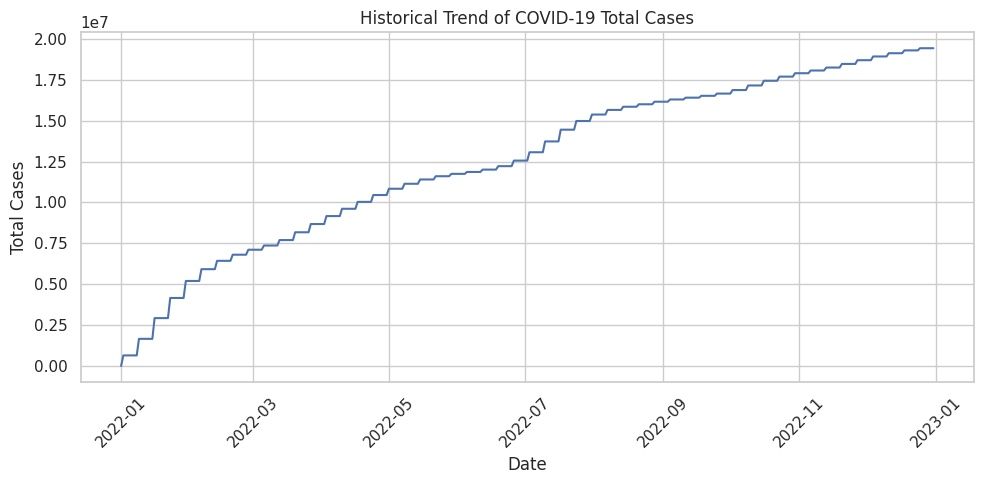

In [282]:
plt.figure(figsize=(10, 5))
plt.plot(italy_df['date'], italy_df['cumulative_cases'], marker='', linestyle='-', color='b')
plt.title('Historical Trend of COVID-19 Total Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Il trend fra total_cases e cumulative_cases (somma cumulativa della colonna new_cases) si assomigliano molto, nonostante i loro valori abbiano comunque delle differenze.

• Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

<ipython-input-283-6c041b6fad58>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  icu_df = icu_df[(df['date'] >= start_date) & (df['date'] <= end_date)]


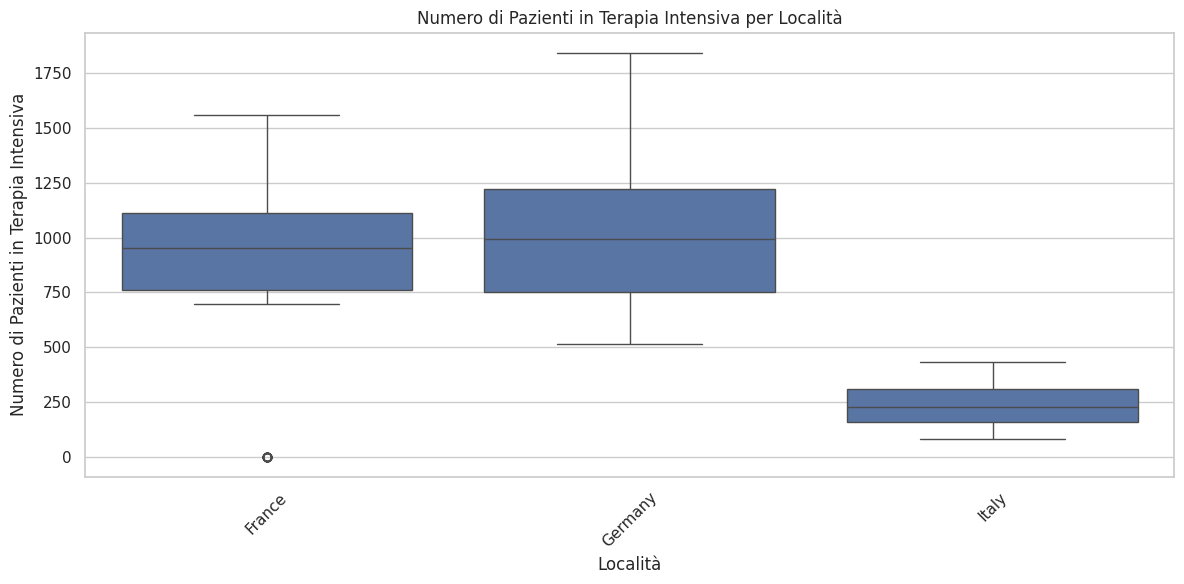

In [283]:
icu_df = df[df['location'].isin(['Italy', 'Germany', 'France'])]

start_date = '2022-05-01'
end_date = '2023-04-30'
icu_df = icu_df[(df['date'] >= start_date) & (df['date'] <= end_date)]
# print( icu_df.date.min() )
# print( icu_df.date.max() )

icu_df = icu_df[['location', 'icu_patients']]

import seaborn as sns
import matplotlib.pyplot as plt

# Assicurati che la colonna "location" sia di tipo categoria per ottenere un box plot ordinato
icu_df['location'] = icu_df['location'].astype('category')

# Creazione del box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='icu_patients', data=icu_df)
plt.title('Numero di Pazienti in Terapia Intensiva per Località')
plt.xlabel('Località')
plt.ylabel('Numero di Pazienti in Terapia Intensiva')
plt.xticks(rotation=45)  # Rotazione delle etichette sull'asse x per migliorare la leggibilità
plt.tight_layout()
plt.show()


I box plot mostrano come per l'italia il numero di pazient in terapia intensiva abbia un range di variabilità inferiore rispetto alle altre due nazioni così come il numero di ricoverati in terapia intensiva è molto inferiore. La Germania è stata la nazione la cui sanità pubblica è stata maggiormente messa alla prova dal numero ricoveri in terapia intensiva. La mediana è di circa 1000 casi ed il box blot mostra una grande varibilità. Anche la Francia, come la Germania, mostra un numero più elevato di ricoveri ma una inferiore variabilità.

In [284]:
icu_df.groupby('location').describe()

icu_patients                                                        \
                count         mean         std    min    25%    50%     75%   
location                                                                      
France          365.0   916.320548  346.224176    0.0  761.0  952.0  1114.0   
Germany         365.0  1022.386301  306.113714  512.0  753.0  994.0  1221.0   
Italy           365.0   231.254795   91.607400   82.0  157.0  227.0   310.0   

                  
             max  
location          
France    1557.0  
Germany   1842.0  
Italy      434.0

N.B. = i dati relativi alle ospedaterapie intensive della nazione Germania erano tutti valori nulli

In [285]:
test = df[df.location == 'Germany']
test
print (test.shape)
test.icu_patients.isna().count()

(1534, 7)


1534

• Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [286]:
df.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'icu_patients', 'hosp_patients'],
      dtype='object')

In [288]:
hosp_df = df[df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])]
hosp_df.sample(10)

,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
166100,Europe,Italy,2021-04-07,3650247,0,3683,32999
166687,Europe,Italy,2022-11-15,23878193,0,238,7087
327883,Europe,Spain,2024-03-03,13980340,0,0,0
166578,Europe,Italy,2022-07-29,20608190,0,400,11168
125947,Europe,Germany,2020-07-30,206243,0,262,0
117234,Europe,France,2021-12-03,7203450,0,2058,11103
166518,Europe,Italy,2022-05-30,17373741,0,255,5536
326920,Europe,Spain,2021-07-14,4031892,0,837,3860
126457,Europe,Germany,2021-12-22,6820211,0,4470,0
166115,Europe,Italy,2021-04-22,3857443,0,3021,25115


In [289]:
hosp_df['year'] = hosp_df['date'].dt.year
hosp_df = hosp_df[hosp_df['year']==2023]
hosp_df = hosp_df[['location', 'hosp_patients']]
hosp_df.sample(10)

<ipython-input-289-e72a4b717685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosp_df['year'] = hosp_df['date'].dt.year


,location,hosp_patients
167017,Italy,3707
166813,Italy,2716
117833,France,0
327652,Spain,0
127152,Germany,0
117799,France,0
117772,France,0
127000,Germany,0
117683,France,12896
127074,Germany,0


<Figure size 1000x600 with 0 Axes>

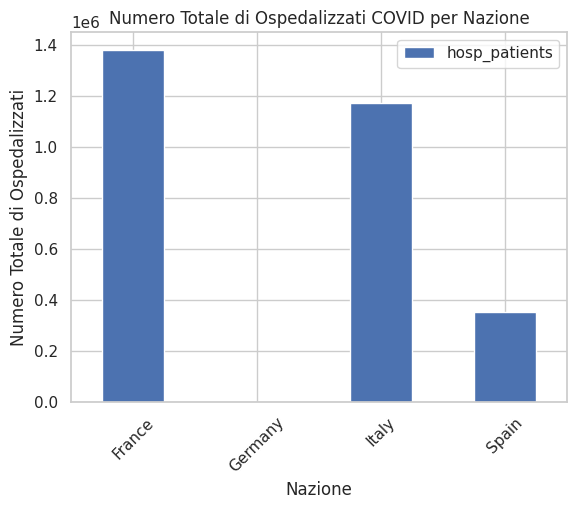

In [290]:
hosp_sum = hosp_df.groupby('location').sum()

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
hosp_sum.plot(kind='bar')
plt.title('Numero Totale di Ospedalizzati COVID per Nazione')
plt.xlabel('Nazione')
plt.ylabel('Numero Totale di Ospedalizzati')
plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.tight_layout()
plt.show()

Ho gestito precedentemente i valori Nan sostituendoli con valore 0.

N.B. = i dati relativi alle ospedalizzazioni della nazione Germania erano tutti valori nulli

In [291]:
hosp_df.groupby('location').describe()

hosp_patients                                                   \
                 count         mean          std    min     25%     50%   
location                                                                  
France           365.0  3787.873973  6841.545910    0.0     0.0     0.0   
Germany          365.0     0.000000     0.000000    0.0     0.0     0.0   
Italy            365.0  3219.923288  1943.855115  719.0  1716.0  2937.0   
Spain            365.0   971.512329  1127.665830    0.0     0.0     0.0   

                           
             75%      max  
location                   
France       0.0  24157.0  
Germany      0.0      0.0  
Italy     3747.0   8409.0  
Spain     2026.0   3585.0